In [1]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

sequence1 = "MKQLEDKVEELLSKNYHLENEVARLKKLV"
sequence2 = "MKQLEDKVEELLSKNYHLENEVARLKKLVGER"

alignments = pairwise2.align.globalxx(sequence1, sequence2)

for alignment in alignments:
    print(format_alignment(*alignment))


MKQLEDKVEELLSKNYHLENEVARLKKLV---
|||||||||||||||||||||||||||||   
MKQLEDKVEELLSKNYHLENEVARLKKLVGER
  Score=29



c:\Users\yskon\anaconda3.2\envs\D4_Gen_Test\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
sequence = pd.read_csv("sequences.csv")
sequence

,seq_id;specie;sequence
0,5kel|ag;Zaire ebolavirus (strain Mayinga-76) (...
1,5kel|ag;Zaire ebolavirus (128952);EAIVNAQPKCNP...
2,5kel|ab;Homo sapiens (9606);EVQLQESGGGLMQPGGSM...
3,5kel|ab;Homo sapiens (9606);DIQMTQSPASLSVSVGET...
4,5kel|ab;Homo sapiens (9606);DVKLLESGGGLVQPGGSL...
...,...
3028,6jht|ab;Human hepatitis A virus Hu/Australia/H...
3029,6jht|ab;Human hepatitis A virus Hu/Australia/H...
3030,5w1m|ab;Homo sapiens (9606);DIVMTQSPESLAVSLGER...
3031,5w1m|ab;Homo sapiens (9606);VQLVESGGGVVHPGRSLR...


In [4]:
sequence.columns

Index(['seq_id;specie;sequence'], dtype='object')

In [5]:
sequence[['seq_id', 'species', 'sequence']] = sequence['seq_id;specie;sequence'].str.split(';', expand=True)
sequence


,seq_id;specie;sequence,seq_id,species,sequence
0,5kel|ag;Zaire ebolavirus (strain Mayinga-76) (...,5kel|ag,Zaire ebolavirus (strain Mayinga-76) (128952),IPLGVIHNSTLQVSDVDKLVCRDKLSSTNQLRSVGLNLEGNGVATD...
1,5kel|ag;Zaire ebolavirus (128952);EAIVNAQPKCNP...,5kel|ag,Zaire ebolavirus (128952),EAIVNAQPKCNPNLHYWTTQDEGAAIGLAWIPYFGPAAEGIYTEGL...
2,5kel|ab;Homo sapiens (9606);EVQLQESGGGLMQPGGSM...,5kel|ab,Homo sapiens (9606),EVQLQESGGGLMQPGGSMKLSCVASGFTFSNYWMNWVRQSPEKGLE...
3,5kel|ab;Homo sapiens (9606);DIQMTQSPASLSVSVGET...,5kel|ab,Homo sapiens (9606),DIQMTQSPASLSVSVGETVSITCRASENIYSSLAWYQQKQGKSPQL...
4,5kel|ab;Homo sapiens (9606);DVKLLESGGGLVQPGGSL...,5kel|ab,Homo sapiens (9606),DVKLLESGGGLVQPGGSLKLSCAASGFSLSTSGVGVGWFRQPSGKG...
...,...,...,...,...
3028,6jht|ab;Human hepatitis A virus Hu/Australia/H...,6jht|ab,Human hepatitis A virus Hu/Australia/HM175/197...,DIVLTQSPAIMSASPGEKVTMTCSATSGLSYIHWYQQKSGTSPKRW...
3029,6jht|ab;Human hepatitis A virus Hu/Australia/H...,6jht|ab,Human hepatitis A virus Hu/Australia/HM175/197...,EVKLVESGGGLVKPGGSLKLSCAASAFTITTYGMSWVRQTPEKRLE...
3030,5w1m|ab;Homo sapiens (9606);DIVMTQSPESLAVSLGER...,5w1m|ab,Homo sapiens (9606),DIVMTQSPESLAVSLGERATINCKSSQSVLYSSRSDNKDYLAWYQQ...
3031,5w1m|ab;Homo sapiens (9606);VQLVESGGGVVHPGRSLR...,5w1m|ab,Homo sapiens (9606),VQLVESGGGVVHPGRSLRLSCAASGFTFGTSIMHWVRQAPGKGMQW...


In [6]:
sequence = sequence.drop(columns=['seq_id;specie;sequence'])


In [36]:
import pandas as pd

# Assuming df1 is your first dataframe and df2 is your second dataframe
# and that 'sequence_id' is the common column you want to merge on.



# Group by 'sequence_id' and concatenate the 'sequence' column
sequence['sequence'] = sequence.groupby('sequence_id')['sequence'].transform(lambda x: ''.join(x))

# Drop duplicate rows based on 'sequence_id' after the concatenation
sequence = sequence.drop_duplicates(subset='sequence_id').reset_index(drop=True)

print(sequence)


     sequence_id                                           sequence  \
0        5kel|ag  IPLGVIHNSTLQVSDVDKLVCRDKLSSTNQLRSVGLNLEGNGVATD...   
1        5kel|ab  EVQLQESGGGLMQPGGSMKLSCVASGFTFSNYWMNWVRQSPEKGLE...   
2        6cwt|ab  QSVKESEGRLVTPGTPLTLTCTGSGFSLSTYAMIWVRQAPGQGVEY...   
3        6cwt|ag  MDIDPYKEFGATVELLSFLPSDFFPSVRDLLDTAAALYRDALESPE...   
4        4fp8|ag  ADPGVQSSSTGKICNNPHRILDGIDCTLIDALLGDPHCDVFQNETW...   
...          ...                                                ...   
1574     5vco|ag  TNACSINGNAPAEIDLRQMRTVTPIRMQGGCGSCWAFSGVAATESA...   
1575     6jht|ag  VGDDSGGFSTTVSTEQNVPDPQVGITTMRDLKGKANRGKMDVSGVQ...   
1576     6jht|ab  DIVLTQSPAIMSASPGEKVTMTCSATSGLSYIHWYQQKSGTSPKRW...   
1577     5w1m|ab  DIVMTQSPESLAVSLGERATINCKSSQSVLYSSRSDNKDYLAWYQQ...   
1578     5w1m|ag  ELPSLCMLNNSFYYMRGGVNTFLIRVSDISVLMKEYDVSIYEPEDL...   

                                                encoded  \
0     [1.52, 0.45, 0.39, 0.36, 0.01, 0.55, 0.06, 0.1...   
1     [1.56, 0.48, 0.87, 0.02

In [37]:
sequence['sequence']

0       IPLGVIHNSTLQVSDVDKLVCRDKLSSTNQLRSVGLNLEGNGVATD...
1       EVQLQESGGGLMQPGGSMKLSCVASGFTFSNYWMNWVRQSPEKGLE...
2       QSVKESEGRLVTPGTPLTLTCTGSGFSLSTYAMIWVRQAPGQGVEY...
3       MDIDPYKEFGATVELLSFLPSDFFPSVRDLLDTAAALYRDALESPE...
4       ADPGVQSSSTGKICNNPHRILDGIDCTLIDALLGDPHCDVFQNETW...
                              ...                        
1574    TNACSINGNAPAEIDLRQMRTVTPIRMQGGCGSCWAFSGVAATESA...
1575    VGDDSGGFSTTVSTEQNVPDPQVGITTMRDLKGKANRGKMDVSGVQ...
1576    DIVLTQSPAIMSASPGEKVTMTCSATSGLSYIHWYQQKSGTSPKRW...
1577    DIVMTQSPESLAVSLGERATINCKSSQSVLYSSRSDNKDYLAWYQQ...
1578    ELPSLCMLNNSFYYMRGGVNTFLIRVSDISVLMKEYDVSIYEPEDL...
Name: sequence, Length: 1579, dtype: object

In [8]:
pep='ALDFEQEMT'

In [38]:

# read the matrix a csv file on github
nlf = pd.read_csv('https://raw.githubusercontent.com/dmnfarrell/epitopepredict/master/epitopepredict/mhcdata/NLF.csv', index_col=0)
nlf['X'] = [0.0] * nlf.shape[0]
nlf['U'] = nlf['C']
def show_matrix(m):
    #display a matrix
    cm = sns.light_palette("seagreen", as_cmap=True)
    display(m.style.background_gradient(cmap=cm))

def nlf_encode(seq, nlf_df):
    encoded_sequences = []
    for amino_acid in seq:
        try:
            # Access the column corresponding to the amino acid
            encoded_value = nlf_df[amino_acid].values
            encoded_sequences.append(encoded_value)
        except KeyError:
            # Handle the case where the amino acid is not a column in nlf_df
            print(f"Encoding for amino acid '{amino_acid}' not found.")
            # Appending a vector of zeros with the same length as the encoding
            encoded_sequences.append(np.zeros((nlf_df.shape[0],)))
    
    sequence_vector = np.concatenate(encoded_sequences)
    return sequence_vector

# You will need to load your sequence dataframe here
# sequence_df = pd.read_csv('your_sequence_file.csv')

# Assuming the sequence dataframe has a column 'sequence' that contains the sequences
sequence['encoded'] = sequence['sequence'].apply(lambda x: nlf_encode(x, nlf))





In [39]:
nlf

,A,R,N,D,C,Q,E,G,H,I,...,M,F,P,S,T,W,Y,V,X,U
1,0.42,1.65,1.68,0.81,2.70,1.71,1.56,1.32,0.13,1.52,...,1.72,2.37,1.41,1.47,0.30,2.83,0.70,1.33,0.0,2.70
2,2.07,1.40,0.30,0.13,0.32,1.11,0.48,2.05,1.50,0.45,...,0.85,0.23,0.27,1.11,0.68,1.79,0.95,1.39,0.0,0.32
3,0.67,0.01,0.49,1.36,1.19,0.08,0.87,0.60,1.22,0.39,...,0.34,0.09,1.09,0.27,0.88,0.16,0.36,0.15,0.0,1.19
4,0.01,0.88,0.15,0.63,1.37,0.15,0.02,0.31,0.52,0.36,...,0.44,0.37,0.77,0.13,0.23,0.14,0.60,0.40,0.0,1.37
5,1.10,0.08,0.09,0.15,0.04,0.11,0.07,0.61,1.14,0.01,...,0.01,0.19,0.87,0.15,0.10,0.42,0.09,0.04,0.0,0.04
6,0.32,0.07,0.59,0.10,0.18,0.45,0.13,0.58,0.45,0.55,...,0.80,0.04,0.33,0.22,0.23,0.84,0.06,0.27,0.0,0.18
7,0.20,0.60,0.06,0.45,0.64,0.11,0.22,0.00,0.13,0.06,...,0.16,0.03,0.04,0.09,0.03,0.13,0.55,0.07,0.0,0.64
8,0.09,0.53,0.02,0.31,0.21,0.08,0.15,0.30,0.04,0.10,...,0.05,0.06,0.27,0.05,0.01,0.06,0.01,0.12,0.0,0.21
9,0.20,0.10,0.14,0.10,0.26,0.02,0.09,0.44,0.10,0.02,...,0.05,0.14,0.43,0.05,0.14,0.04,0.28,0.10,0.0,0.26
10,0.09,0.01,0.00,0.03,0.35,0.25,0.10,0.14,0.07,0.08,...,0.30,0.14,0.06,0.14,0.16,0.18,0.17,0.06,0.0,0.35


In [11]:
nlf.to_csv(index=False)

'A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V,X,U\r\n0.42,1.65,1.68,0.81,2.7,1.71,1.56,1.32,0.13,1.52,1.29,2.03,1.72,2.37,1.41,1.47,0.3,2.83,0.7,1.33,0.0,2.7\r\n2.07,1.4,0.3,0.13,0.32,1.11,0.48,2.05,1.5,0.45,1.21,0.26,0.85,0.23,0.27,1.11,0.68,1.79,0.95,1.39,0.0,0.32\r\n0.67,0.01,0.49,1.36,1.19,0.08,0.87,0.6,1.22,0.39,0.25,1.22,0.34,0.09,1.09,0.27,0.88,0.16,0.36,0.15,0.0,1.19\r\n0.01,0.88,0.15,0.63,1.37,0.15,0.02,0.31,0.52,0.36,0.96,0.98,0.44,0.37,0.77,0.13,0.23,0.14,0.6,0.4,0.0,1.37\r\n1.1,0.08,0.09,0.15,0.04,0.11,0.07,0.61,1.14,0.01,0.18,0.05,0.01,0.19,0.87,0.15,0.1,0.42,0.09,0.04,0.0,0.04\r\n0.32,0.07,0.59,0.1,0.18,0.45,0.13,0.58,0.45,0.55,0.06,0.32,0.8,0.04,0.33,0.22,0.23,0.84,0.06,0.27,0.0,0.18\r\n0.2,0.6,0.06,0.45,0.64,0.11,0.22,0.0,0.13,0.06,0.04,0.1,0.16,0.03,0.04,0.09,0.03,0.13,0.55,0.07,0.0,0.64\r\n0.09,0.53,0.02,0.31,0.21,0.08,0.15,0.3,0.04,0.1,0.0,0.73,0.05,0.06,0.27,0.05,0.01,0.06,0.01,0.12,0.0,0.21\r\n0.2,0.1,0.14,0.1,0.26,0.02,0.09,0.44,0.1,0.02,0.09,0.11,0.05,0.14,0.43,0.05,0

In [40]:
sequence

,sequence_id,sequence,encoded,species_name,strain,identifier,interaction_type
0,5kel|ag,IPLGVIHNSTLQVSDVDKLVCRDKLSSTNQLRSVGLNLEGNGVATD...,"[1.52, 0.45, 0.39, 0.36, 0.01, 0.55, 0.06, 0.1...",Zaire ebolavirus,NaN,Mayinga-76,ag
1,5kel|ab,EVQLQESGGGLMQPGGSMKLSCVASGFTFSNYWMNWVRQSPEKGLE...,"[1.56, 0.48, 0.87, 0.02, 0.07, 0.13, 0.22, 0.1...",Homo sapiens,9606.0,None,ab
2,6cwt|ab,QSVKESEGRLVTPGTPLTLTCTGSGFSLSTYAMIWVRQAPGQGVEY...,"[1.71, 1.11, 0.08, 0.15, 0.11, 0.45, 0.11, 0.0...",Oryctolagus cuniculus,9986.0,None,ab
3,6cwt|ag,MDIDPYKEFGATVELLSFLPSDFFPSVRDLLDTAAALYRDALESPE...,"[1.72, 0.85, 0.34, 0.44, 0.01, 0.8, 0.16, 0.05...",Hepatitis B virus subtype adyw,10419.0,None,ag
4,4fp8|ag,ADPGVQSSSTGKICNNPHRILDGIDCTLIDALLGDPHCDVFQNETW...,"[0.42, 2.07, 0.67, 0.01, 1.1, 0.32, 0.2, 0.09,...",Influenza A virus,506350.0,None,ag
...,...,...,...,...,...,...,...
1574,5vco|ag,TNACSINGNAPAEIDLRQMRTVTPIRMQGGCGSCWAFSGVAATESA...,"[0.3, 0.68, 0.88, 0.23, 0.1, 0.23, 0.03, 0.01,...",Dermatophagoides pteronyssinus,6956.0,None,ag
1575,6jht|ag,VGDDSGGFSTTVSTEQNVPDPQVGITTMRDLKGKANRGKMDVSGVQ...,"[1.33, 1.39, 0.15, 0.4, 0.04, 0.27, 0.07, 0.12...",Human hepatitis A virus Hu/Australia/HM175/1976,12098.0,None,ag
1576,6jht|ab,DIVLTQSPAIMSASPGEKVTMTCSATSGLSYIHWYQQKSGTSPKRW...,"[0.81, 0.13, 1.36, 0.63, 0.15, 0.1, 0.45, 0.31...",Human hepatitis A virus Hu/Australia/HM175/1976,12098.0,None,ab
1577,5w1m|ab,DIVMTQSPESLAVSLGERATINCKSSQSVLYSSRSDNKDYLAWYQQ...,"[0.81, 0.13, 1.36, 0.63, 0.15, 0.1, 0.45, 0.31...",Homo sapiens,9606.0,None,ab


#### Clean CSV 

resplit bien les colonnes et nom explicit

In [13]:


temp_df = sequence['species'].str.split(' \(', expand=True)


sequence['species_name'] = temp_df[0]


if temp_df.shape[1] > 1:
    sequence['strain_identifier'] = temp_df[1].str.rstrip(')')


if 'strain_identifier' in sequence.columns:
    temp_df = sequence['strain_identifier'].str.split(' ', 1, expand=True)
    sequence['strain'] = temp_df[0]
    sequence['identifier'] = temp_df[1]

# Drop a temporary or unnecessary columns
sequence.drop(columns=['species', 'strain_identifier'], inplace=True)

# Rename the 'seq_id' column to 'sequence_id'
sequence.rename(columns={'seq_id': 'sequence_id'}, inplace=True)







######  TYPE 


sequence['species_name'] = sequence['species_name'].astype('string')
sequence['strain'] = pd.to_numeric(sequence['strain'], errors='coerce')


C:\Users\yskon\AppData\Local\Temp\ipykernel_13540\1232954492.py:12: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  temp_df = sequence['strain_identifier'].str.split(' ', 1, expand=True)


In [14]:
sequence


,sequence_id,sequence,encoded,species_name,strain,identifier
0,5kel|ag,IPLGVIHNSTLQVSDVDKLVCRDKLSSTNQLRSVGLNLEGNGVATD...,"[1.52, 0.45, 0.39, 0.36, 0.01, 0.55, 0.06, 0.1...",Zaire ebolavirus,NaN,Mayinga-76
1,5kel|ag,EAIVNAQPKCNPNLHYWTTQDEGAAIGLAWIPYFGPAAEGIYTEGL...,"[1.56, 0.48, 0.87, 0.02, 0.07, 0.13, 0.22, 0.1...",Zaire ebolavirus,128952.0,None
2,5kel|ab,EVQLQESGGGLMQPGGSMKLSCVASGFTFSNYWMNWVRQSPEKGLE...,"[1.56, 0.48, 0.87, 0.02, 0.07, 0.13, 0.22, 0.1...",Homo sapiens,9606.0,None
3,5kel|ab,DIQMTQSPASLSVSVGETVSITCRASENIYSSLAWYQQKQGKSPQL...,"[0.81, 0.13, 1.36, 0.63, 0.15, 0.1, 0.45, 0.31...",Homo sapiens,9606.0,None
4,5kel|ab,DVKLLESGGGLVQPGGSLKLSCAASGFSLSTSGVGVGWFRQPSGKG...,"[0.81, 0.13, 1.36, 0.63, 0.15, 0.1, 0.45, 0.31...",Homo sapiens,9606.0,None
...,...,...,...,...,...,...
3028,6jht|ab,DIVLTQSPAIMSASPGEKVTMTCSATSGLSYIHWYQQKSGTSPKRW...,"[0.81, 0.13, 1.36, 0.63, 0.15, 0.1, 0.45, 0.31...",Human hepatitis A virus Hu/Australia/HM175/1976,12098.0,None
3029,6jht|ab,EVKLVESGGGLVKPGGSLKLSCAASAFTITTYGMSWVRQTPEKRLE...,"[1.56, 0.48, 0.87, 0.02, 0.07, 0.13, 0.22, 0.1...",Human hepatitis A virus Hu/Australia/HM175/1976,12098.0,None
3030,5w1m|ab,DIVMTQSPESLAVSLGERATINCKSSQSVLYSSRSDNKDYLAWYQQ...,"[0.81, 0.13, 1.36, 0.63, 0.15, 0.1, 0.45, 0.31...",Homo sapiens,9606.0,None
3031,5w1m|ab,VQLVESGGGVVHPGRSLRLSCAASGFTFGTSIMHWVRQAPGKGMQW...,"[1.33, 1.39, 0.15, 0.4, 0.04, 0.27, 0.07, 0.12...",Homo sapiens,9606.0,None


In [15]:
sequence["identifier"]
identif_null = sequence['identifier'].isna().sum()
print(f"nombre de nan': {identif_null}")




nombre de nan': 2965


### Modèle  Siammois

In [16]:
data = pd.read_csv("data.csv")
data

,ab;ag;interaction
0,5kel|ab;5kel|ag;1
1,5kel|ab;6cwt|ag;0
2,5kel|ab;4fp8|ag;0
3,5kel|ab;4yjz|ag;0
4,5kel|ab;6j15|ag;0
...,...
421816,5vco|ab;6jht|ag;0
421817,5vco|ab;5w1m|ag;0
421818,6jht|ab;6jht|ag;1
421819,6jht|ab;5w1m|ag;0


In [17]:
# Vérifiez d'abord le nom réel de la colonne que vous souhaitez diviser, il doit correspondre exactement.
print(data.columns)

# Divisez la colonne 'ab;ag;interaction' en trois nouvelles colonnes
data[['ab', 'ag', 'interaction']] = data['ab;ag;interaction'].str.split(';', expand=True)

# Convertissez la colonne 'interaction' en entiers, si nécessaire.
data['interaction'] = data['interaction'].astype(int)
data = data.drop(columns=['ab;ag;interaction'])

# Vérifiez le résultat
data.head()


Index(['ab;ag;interaction'], dtype='object')


,ab,ag,interaction
0,5kel|ab,5kel|ag,1
1,5kel|ab,6cwt|ag,0
2,5kel|ab,4fp8|ag,0
3,5kel|ab,4yjz|ag,0
4,5kel|ab,6j15|ag,0


In [18]:
data['interaction'] = pd.to_numeric(data['interaction'], errors='coerce').fillna(2).astype(int)
print(data)


             ab       ag  interaction
0       5kel|ab  5kel|ag            1
1       5kel|ab  6cwt|ag            0
2       5kel|ab  4fp8|ag            0
3       5kel|ab  4yjz|ag            0
4       5kel|ab  6j15|ag            0
...         ...      ...          ...
421816  5vco|ab  6jht|ag            0
421817  5vco|ab  5w1m|ag            0
421818  6jht|ab  6jht|ag            1
421819  6jht|ab  5w1m|ag            0
421820  5w1m|ab  5w1m|ag            1

[421821 rows x 3 columns]


## Modèle

In [ ]:
data = pd.read_csv('iBio-Summer-School/Interactions.tsv', sep='\t')
dict_seq = pd.read_csv('iBio-Summer-School/Dictionary.tsv', sep='\t')

0    419299
1      2522
Name: interaction, dtype: int64


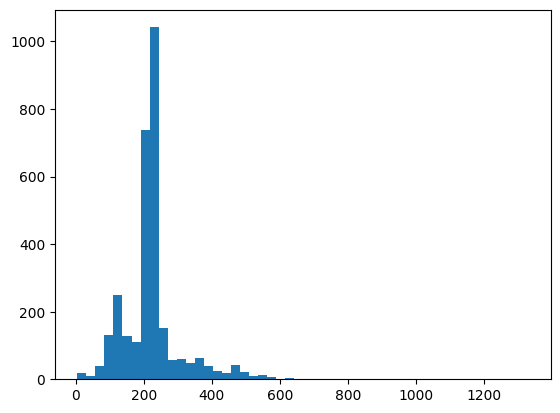

In [35]:
print(data['interaction'].value_counts())

plt.hist(sequence['sequence'].str.len(), bins=50)
plt.show()

In [41]:

data = data.merge(sequence, left_on="ab", right_on="sequence_id", how="inner")
data.rename(columns={"sequence": "sequence_ab"}, inplace=True)
data = data.merge(sequence, left_on="ag", right_on="sequence_id", how="inner")
data.rename(columns={"sequence": "sequence_ag"}, inplace=True)
data = data[["sequence_ab", "sequence_ag", "interaction"]]
data.head()

KeyError: 'seq_id'